In [186]:
import pandas as pd
import matplotlib.pyplot as plt
X=pd.read_csv('Data.csv')
Y=pd.read_csv('Class.csv')

X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X=X[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
Y=Y['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=7)

<h2>Standardization</h2>

In [189]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()

#fit only on training data
#scaler.fit(X_train)
#X_train=scaler.fit_transform(X_train)

#apply same transformation to test data
#X_test=sc_X.transform(X_test)

#result will be from 0 to 1 or from -1 to +1
#X_train


<h2>Normalization</h2>

In [190]:
from sklearn.preprocessing import MinMaxScaler
sc_X=MinMaxScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
#X_train #result is between 0 and 1

In [191]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


# 

In [192]:

#SVM
#kernel='rbf',random_state=4
model_svc=SVC()
model_svc.fit(X_train,y_train)
y_pred_svm=model_svc.decision_function(X_test)

In [193]:
#NB
model_nb=MultinomialNB()
model_nb.fit(X_train,y_train)
y_pred_nb=model_nb.predict(X_test)

In [194]:
#DT
#max_leaf_nodes=8,criterion='entropy', max_depth=10,max_features=9,min_samples_split= 2,random_state=0
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred_dt=model_dt.predict(X_test)

In [195]:
#NN Sequencial
model=Sequential()
model.add(Dense(200,input_dim=9,activation='relu'))
model.add(Dense(200,input_dim=200,activation='relu'))
model.add(Dense(200,input_dim=200,activation='relu'))
model.add(Dense(1,activation='linear'))


model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
              metrics=['Accuracy','mean_absolute_error'])
#batch_size=32, validation_split=0.15, validation_data=0.3, 
model_sq=model.fit(X_train, y_train, epochs=5, verbose=0)
y_pred_sq=model.predict(X_test)
model.evaluate(X_test, y_test)

38/38 [==============================] - 0s 1ms/step - loss: 0.2426 - Accuracy: 0.5746 - mean_absolute_error: 0.4895


[0.2426162213087082, 0.5746455192565918, 0.4895259439945221]

In [196]:
#NN MLPC
#solver='adam', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1
model_nn=MLPClassifier()
model_nn.fit(X_train, y_train)
y_pred_nn=model_nn.predict(X_test)

C:\Users\Wobetu PC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<h1>ROC and AUC</h1>

In [197]:
from sklearn.metrics import roc_curve, auc

In [198]:
#SVM
svm_fpr, svm_tpr, threshold = roc_curve(y_test,y_pred_svm)
auc_svm=auc(svm_fpr,svm_tpr)

In [199]:
#DT
dt_fpr, dt_tpr, threshold = roc_curve(y_test,y_pred_dt)
auc_dt=auc(dt_fpr,dt_tpr)

In [200]:
#NB
nb_fpr, nb_tpr, threshold = roc_curve(y_test,y_pred_nb)
auc_nb=auc(nb_fpr,nb_tpr)

In [201]:
#NN MLPC
nn_fpr, nn_tpr, threshold = roc_curve(y_test,y_pred_nn)
auc_nn=auc(nn_fpr,nn_tpr)

In [202]:
#NN Sq
sq_fpr, sq_tpr, threshold=roc_curve(y_test, y_pred_sq)
auc_sq=auc(sq_fpr,sq_tpr)

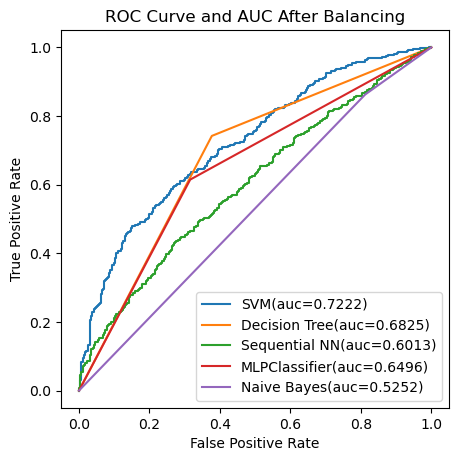

In [204]:
plt.figure(figsize=(5,5), dpi=100)

plt.plot(svm_fpr,svm_tpr,linestyle='-', label='SVM(auc=%0.4f)' %auc_svm)
plt.plot(dt_fpr,dt_tpr,marker='', label='Decision Tree(auc=%0.4f)' %auc_dt)
plt.plot(sq_fpr,sq_tpr,marker='',label='Sequential NN(auc=%0.4f)'%auc_sq)
plt.plot(nn_fpr,nn_tpr,marker='', label='MLPClassifier(auc=%0.4f)' %auc_nn)
plt.plot(nb_fpr,nb_tpr,marker='', label='Naive Bayes(auc=%0.4f)' %auc_nb)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve and AUC After Balancing')

plt.legend()
plt.show()